### Timeline Analysis : Covid-19

(Level - Advanced)

● Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

● Use animation, timeline and annotations to create attractive and interactive dashboards and story

● Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

● Screen-record the completed storyboard along with your audio explaining the charts and giving recommendations.

● Dataset: Daily updated .csv file on https://bit.ly/30d2gdi

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Reading data 
data = pd.read_csv(r"owid-covid-data.csv",encoding="ISO-8859-1")
data_original = pd.read_csv(r"owid-covid-data.csv",encoding="ISO-8859-1")
print("Data imported successfully")

Data imported successfully


In [3]:
# First 5 Rows of the dataset
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
# Last 5 Rows of the dataset
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
95061,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,2639.991,3.297,2.662,108.390,0.336,0.163,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2119.0,564986.0,38.013,0.143,2024.0,0.136,0.020,51.1,tests performed,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95062,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,2645.576,5.584,3.105,108.794,0.404,0.173,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2983.0,567969.0,38.214,0.201,2110.0,0.142,0.022,45.7,tests performed,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95063,ZWE,Africa,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,2653.044,7.468,3.854,109.131,0.336,0.221,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3427.0,571396.0,38.444,0.231,2231.0,0.150,0.026,38.9,tests performed,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95064,ZWE,Africa,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,3.143,2657.350,4.306,3.883,109.400,0.269,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2841.0,574237.0,38.636,0.191,2377.0,0.160,0.024,41.2,tests performed,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95065,ZWE,Africa,Zimbabwe,2021-06-11,39688.0,192.0,77.714,1629.0,3.0,3.429,2670.268,12.918,5.229,109.602,0.202,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [5]:
#Statistical Information of the dataframe
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.196100e+04,91958.000000,90948.000000,8.197400e+04,82130.000000,90948.000000,91470.000000,91467.000000,90462.000000,81496.000000,81652.000000,90462.000000,76495.000000,9627.000000,9627.000000,11971.000000,11971.000000,873.000000,873.000000,1507.000000,1507.000000,4.295200e+04,4.264800e+04,42648.000000,42952.000000,4.982300e+04,49823.000000,46972.000000,46373.000000,1.422700e+04,1.344500e+04,1.065200e+04,1.189400e+04,2.449600e+04,14227.000000,13445.000000,10652.000000,24496.000000,80005.000000,9.444100e+04,88386.000000,85188.000000,84228.000000,84716.000000,85474.000000,57767.000000,85580.000000,87650.000000,66978.000000,65997.000000,42998.000000,78006.000000,90271.000000,85744.000000,3344.000000
mean,9.862787e+05,6060.037528,6086.420596,2.712044e+04,147.189492,131.726452,12121.935411,76.155795,76.452734,271.552276,1.562302,1.400384,1.006051,1082.546899,26.902908,4731.612564,173.297543,273.736076,20.876238,3625.087647,112.510548,4.669900e+04,7.182765e+06,285.377511,2.071574,4.443639e+04,1.982180,0.088550,161.800677,2.469961e+07,1.324923e+07,7.457822e+06,5.869573e+05,2.836570e+05,20.302589,13.545355,8.089168,3099.472485,58.568513,1.256774e+08,383.238215,30.571035,8.795193,5.568680,19285.798203,13.388455,258.267207,7.905837,10.553273,32.682582,50.857473,3.028655,73.231241,0.727575,18.177156
std,6.791145e+06,38075.024088,37820.820830,1.615441e+05,805.001883,744.135382,22636.967452,198.513264,158.785194,496.079644,3.990983,3.049817,0.353215,2933.522099,27.392967,12040.383697,212.765742,570.106935,35.823069,10948.353428,218.170315,1.728994e+05,3.169419e+07,658.568123,5.895228,1.575372e+05,4.976027,0.096889,885.854446,1.252043e+08,5.864603e+07,3.195003e+07,2.671638e+06,1.780730e+06,27.731898,16.977268,12.210105,4471.739029,21.179802,6.827238e+08,1784.730600,9.131974,6.215328,4.240242,19971.592401,19.954718,118.943291,4.113493,10.446285,13.479298,31.760418,2.460214,7.561660,0.150382,36.279736
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.154000e+03,2.000000,7.286000,5.100000e+01,0.000000,0.000000,241.523500,0.207000,1.256250,7.766000,0.000000,0.000000,0.840000,32.000000,4.810000,120.000000,23.824000,8.877000,1.909000,51.545000,9.661500,1.578750e+03,1.485500e+05,13.330750,0.136000,1.651000e+03,0.135000,0.017000,7.800000,9.552750e+04,7.405900e+04,3.888950e+04,4.048500e+03,8.510000e+02,

In [6]:
#Columns in the dataframe
data.columns.values

array(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_

In [7]:
# Determining the shape of the dataset
print("There are total %d columns in the dataset." %data.shape[1])
print("There are total %d rows in the dataset." %data.shape[0])

There are total 60 columns in the dataset.
There are total 95066 rows in the dataset.


In [8]:
# Basic Information of the dataset
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95066 entries, 0 to 95065
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               95066 non-null  object 
 1   continent                              90577 non-null  object 
 2   location                               95066 non-null  object 
 3   date                                   95066 non-null  object 
 4   total_cases                            91961 non-null  float64
 5   new_cases                              91958 non-null  float64
 6   new_cases_smoothed                     90948 non-null  float64
 7   total_deaths                           81974 non-null  float64
 8   new_deaths                             82130 non-null  float64
 9   new_deaths_smoothed                    90948 non-null  float64
 10  total_cases_per_million                91470 non-null  float64
 11  ne

In [9]:
# Determining the Datatype of the dataset
data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [10]:
# Determining the unique values in the dataset
data.nunique()

iso_code                                   229
continent                                    6
location                                   229
date                                       528
total_cases                              50526
new_cases                                12491
new_cases_smoothed                       24059
total_deaths                             19415
new_deaths                                2962
new_deaths_smoothed                       6745
total_cases_per_million                  71383
new_cases_per_million                    40230
new_cases_smoothed_per_million           45472
total_deaths_per_million                 44690
new_deaths_per_million                    7677
new_deaths_smoothed_per_million           9077
reproduction_rate                          366
icu_patients                              2547
icu_patients_per_million                  5439
hosp_patients                             4962
hosp_patients_per_million                 9067
weekly_icu_ad

In [11]:
#Determining the missing values in the dataset
data.isnull().sum()

iso_code                                     0
continent                                 4489
location                                     0
date                                         0
total_cases                               3105
new_cases                                 3108
new_cases_smoothed                        4118
total_deaths                             13092
new_deaths                               12936
new_deaths_smoothed                       4118
total_cases_per_million                   3596
new_cases_per_million                     3599
new_cases_smoothed_per_million            4604
total_deaths_per_million                 13570
new_deaths_per_million                   13414
new_deaths_smoothed_per_million           4604
reproduction_rate                        18571
icu_patients                             85439
icu_patients_per_million                 85439
hosp_patients                            83095
hosp_patients_per_million                83095
weekly_icu_ad

Finding Total number of null values in a dataset

In [12]:
round(100*data.isnull().sum()/len(data.index),2).sort_values(ascending=False)

weekly_icu_admissions                    99.08
weekly_icu_admissions_per_million        99.08
weekly_hosp_admissions                   98.41
weekly_hosp_admissions_per_million       98.41
excess_mortality                         96.48
icu_patients                             89.87
icu_patients_per_million                 89.87
people_fully_vaccinated_per_hundred      88.80
people_fully_vaccinated                  88.80
new_vaccinations                         87.49
hosp_patients                            87.41
hosp_patients_per_million                87.41
people_vaccinated                        85.86
people_vaccinated_per_hundred            85.86
total_vaccinations_per_hundred           85.03
total_vaccinations                       85.03
new_vaccinations_smoothed_per_million    74.23
new_vaccinations_smoothed                74.23
total_tests                              55.14
total_tests_per_thousand                 55.14
new_tests_per_thousand                   54.82
new_tests    

In [13]:
data.continent.value_counts()

Africa           24549
Asia             22610
Europe           22563
North America    11650
South America     5739
Oceania           3466
Name: continent, dtype: int64

In [14]:
data['date'] = pd.to_datetime(data['date'])
starting_date = data.sort_values("date",ascending= True)
starting_date.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
55308,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
3398,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
55309,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,98.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
3399,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,37.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
3400,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,0.001,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN


In [15]:
#Considering China from where the covid spread
china_data = data[data['location'] =='China']
china_data = china_data[~china_data['new_cases'].isin(['World','International'])]
starting_date_china= china_data.sort_values("date",ascending= True)
starting_date_china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
17861,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
17862,CHN,Asia,China,2020-01-23,641.0,93.0,NaN,18.0,1.0,NaN,0.445,0.065,NaN,0.013,0.001,NaN,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
17863,CHN,Asia,China,2020-01-24,918.0,277.0,NaN,26.0,8.0,NaN,0.638,0.192,NaN,0.018,0.006,NaN,3.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
17864,CHN,Asia,China,2020-01-25,1401.0,483.0,NaN,42.0,16.0,NaN,0.973,0.336,NaN,0.029,0.011,NaN,3.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
17865,CHN,Asia,China,2020-01-26,2067.0,666.0,NaN,56.0,14.0,NaN,1.436,0.463,NaN,0.039,0.010,NaN,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN


The first case in china was registered on 22nd January 2020 with 548 Cases

In [16]:
#Determing the mean Date of the dataset
data['date'].mean()

Timestamp('2020-10-25 11:01:50.045674752')

In [17]:
# Extracting the month, year from the date column
data['Mon'] = data['date'].dt.strftime('%b')
data['Year'] = data['date'].dt.strftime('%Y')
data["Year_Mon"]=data['date'].dt.strftime('%Y-%b')

In [18]:
#FILTERIING ROWS OF THE DATASET
asia_data=data[data["continent"]=="Asia"]
asia_data=asia_data[~asia_data.isin(["World","International"])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Feb,2020,2020-Feb
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Feb,2020,2020-Feb
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Feb,2020,2020-Feb
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Feb,2020,2020-Feb
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Feb,2020,2020-Feb


In [19]:
asia_data_grouped=asia_data.groupby("location").sum()

In [20]:
asia_data_grouped.reset_index(inplace = True)

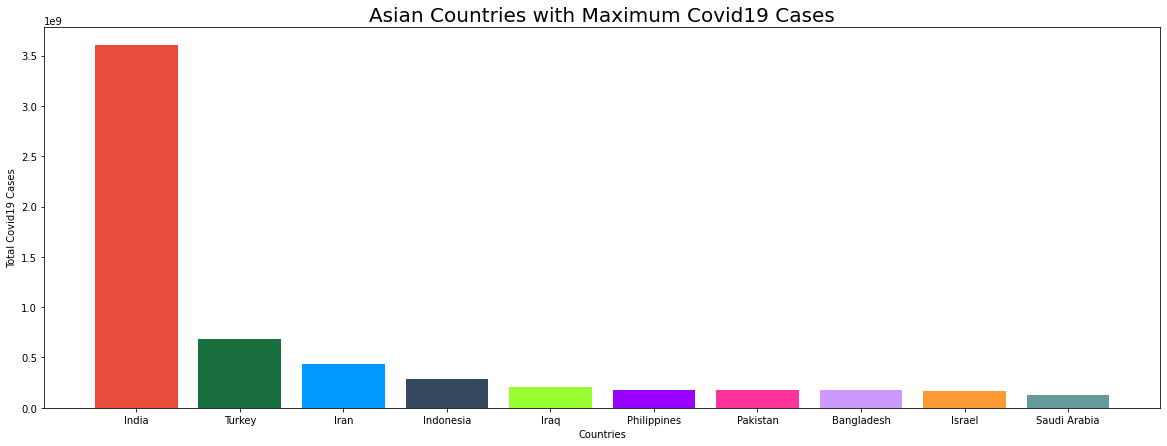

In [21]:
#Bargraph of Asian countries with maximum Covid19 cases
asia_max_cases=asia_data_grouped.sort_values("total_cases",ascending=False)
fig=plt.figure(figsize=(20,7))
plt.bar(asia_max_cases["location"][:10],asia_max_cases["total_cases"][:10],color=["#e74c3c","#196f3d","#0099ff","#34495e","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Countries")
plt.ylabel("Total Covid19 Cases")
plt.title("Asian Countries with Maximum Covid19 Cases",fontsize=20)
plt.show()

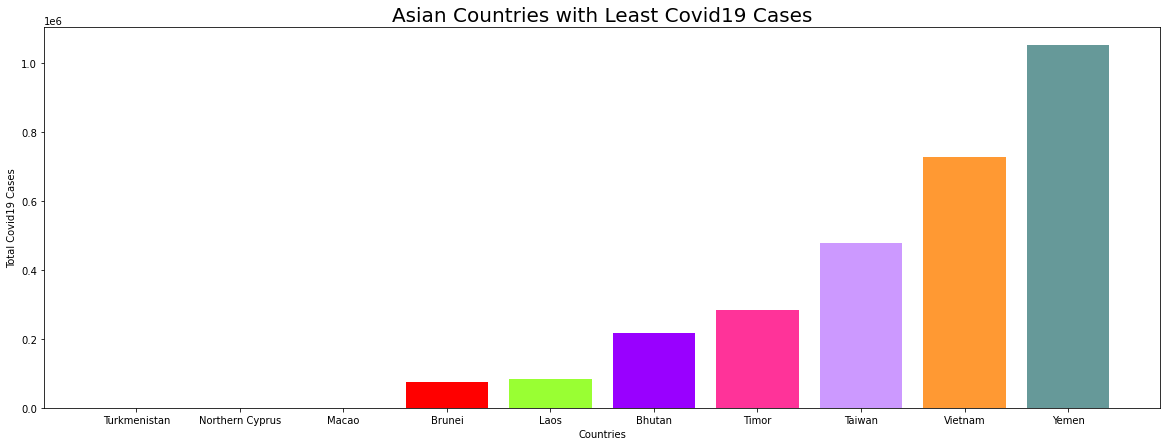

In [22]:
#Bargraph of Asian countries with Least number of covid cases
asia_least_cases=asia_data_grouped.sort_values("total_cases",ascending=True)
fig=plt.figure(figsize=(20,7))
plt.bar(asia_least_cases["location"][:10],asia_least_cases["total_cases"][:10],color=["#ff9900","#ffff00","#0099ff","#ff0000","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Countries")
plt.ylabel("Total Covid19 Cases")
plt.title("Asian Countries with Least Covid19 Cases",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

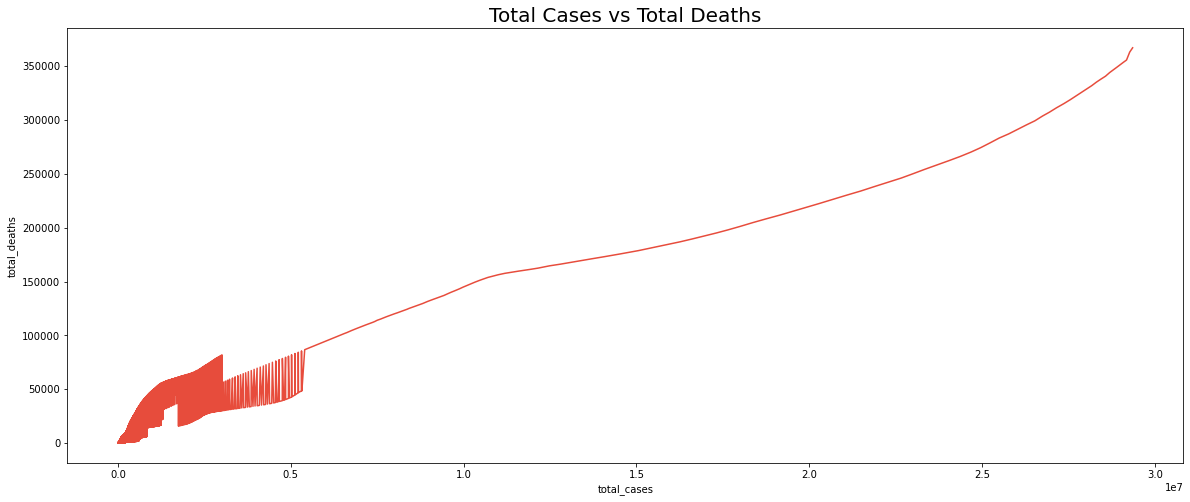

In [23]:
#Lineplot of Total Cases vs Total Deaths
plt.figure(figsize=(20,8))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="#E74C3C")
plt.title("Total Cases vs Total Deaths",fontsize=20)

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

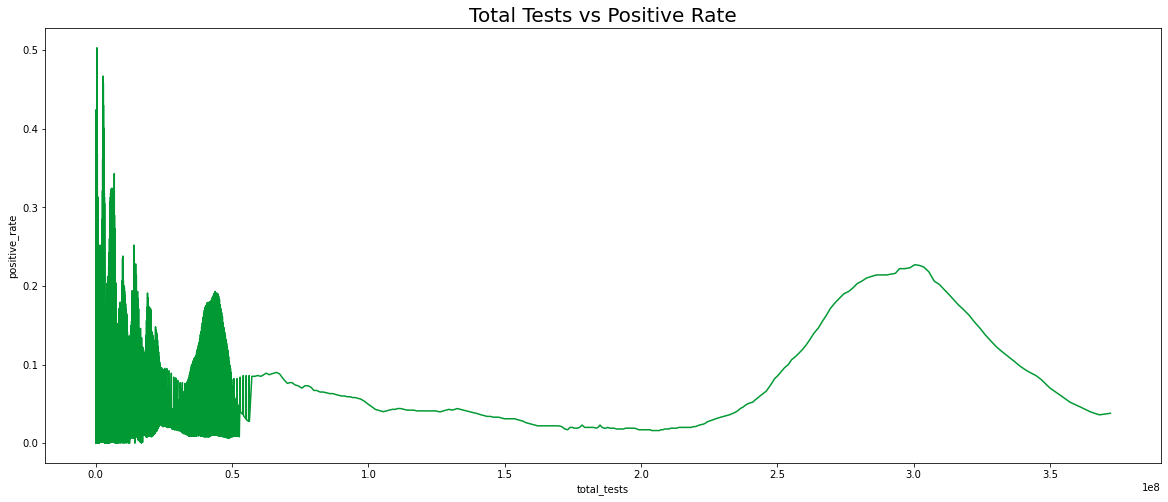

In [24]:
#Lineplot of Total number of tests and Positive rate
plt.figure(figsize=(20,8))
sns.lineplot(x='total_tests',y='positive_rate',data=asia_data,color="#009933")
plt.title("Total Tests vs Positive Rate",fontsize=20)

Text(0.5, 1.0, 'Total Deaths vs New Deaths per million')

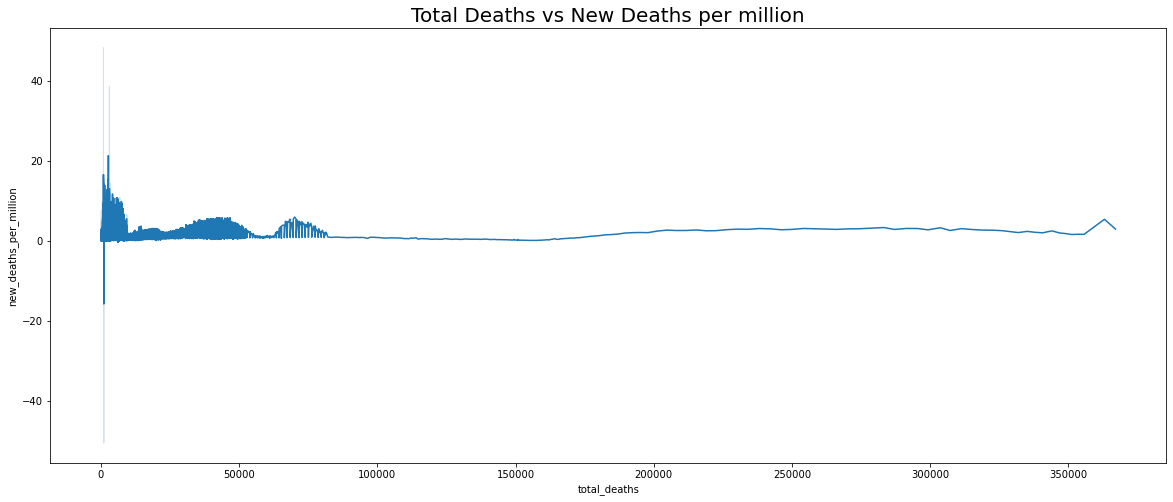

In [25]:
#Lineplot of Total Deaths Vs New Deaths Per Million
plt.figure(figsize=(20,8))
sns.lineplot(x='total_deaths',y='new_deaths_per_million',data=asia_data)
plt.title("Total Deaths vs New Deaths per million",fontsize=20)

In [26]:
china_dat = data[data['location'] =='China']
china_dat = china_dat[~china_data['new_cases'].isin(['World','International'])]
starting_dat_china= china_dat.sort_values("date",ascending= True)
starting_dat_china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
17861,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,Jan,2020,2020-Jan
17862,CHN,Asia,China,2020-01-23,641.0,93.0,NaN,18.0,1.0,NaN,0.445,0.065,NaN,0.013,0.001,NaN,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,Jan,2020,2020-Jan
17863,CHN,Asia,China,2020-01-24,918.0,277.0,NaN,26.0,8.0,NaN,0.638,0.192,NaN,0.018,0.006,NaN,3.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,Jan,2020,2020-Jan
17864,CHN,Asia,China,2020-01-25,1401.0,483.0,NaN,42.0,16.0,NaN,0.973,0.336,NaN,0.029,0.011,NaN,3.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,Jan,2020,2020-Jan
17865,CHN,Asia,China,2020-01-26,2067.0,666.0,NaN,56.0,14.0,NaN,1.436,0.463,NaN,0.039,0.010,NaN,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,Jan,2020,2020-Jan


In [27]:
data['location'].value_counts().sort_index(ascending=True)

Afghanistan                         474
Africa                              485
Albania                             473
Algeria                             473
Andorra                             467
Angola                              449
Anguilla                            121
Antigua and Barbuda                 456
Argentina                           528
Armenia                             468
Aruba                                75
Asia                                507
Australia                           503
Austria                             473
Azerbaijan                          468
Bahamas                             453
Bahrain                             474
Bangladesh                          466
Barbados                            452
Belarus                             470
Belgium                             494
Belize                              446
Benin                               453
Bermuda                             149
Bhutan                              463


In [28]:
dataset = data[data['date']=='2020-10-25'] #which is the mean of the start and the end date in the dataset
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
244,AFG,Asia,Afghanistan,2020-10-25,40833.0,65.0,90.429,1516.0,3.0,3.143,1048.927,1.670,2.323,38.943,0.077,0.081,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN,Oct,2020,2020-Oct
729,OWID_AFR,NaN,Africa,2020-10-25,1718462.0,9094.0,10311.429,41259.0,116.0,216.143,1281.862,6.784,7.692,30.777,0.087,0.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
1202,ALB,Europe,Albania,2020-10-25,19157.0,299.0,300.286,477.0,4.0,3.714,6656.821,103.899,104.346,165.752,1.390,1.291,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.0,112556.0,39.112,0.457,1379.0,0.479,0.218,4.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,Oct,2020,2020-Oct
1675,DZA,Africa,Algeria,2020-10-25,56143.0,263.0,248.714,1914.0,7.0,8.286,1280.312,5.998,5.672,43.648,0.160,0.189,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN,Oct,2020,2020-Oct
2142,AND,Europe,Andorra,2020-10-25,4038.0,0.0,94.429,69.0,0.0,1.429,52261.697,0.000,1222.139,893.030,0.000,18.489,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN,Oct,2020,2020-Oct
2591,AGO,Africa,Angola,2020-10-25,9381.0,355.0,251.286,268.0,1.0,3.000,285.429,10.801,7.646,8.154,0.030,0.091,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN,Oct,2020,2020-Oct
3168,ATG,North America,Antigua and Barbuda,2020-10-25,124.0,0.0,0.714,3.0,0.0,0.000,1266.236,0.000,7.294,30.635,0.000,0.000,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.792800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN,Oct,2020,2020-Oct
3696,ARG,South America,Argentina,2020-10-25,1090589.0,9253.0,14415.571,28896.0,283.0,375.571,24130.330,204.732,318.958,639.352,6.262,8.310,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13861.0,2991022.0,66.179,0.307,26817.0,0.593,0.335,3.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN

Top 10 Countries New Cases Wise and Total Death Wise

In [29]:
top_10_countries_by_new_cases = dataset.sort_values("new_cases",ascending= False)
top_10_countries_by_new_cases = top_10_countries_by_new_cases[~top_10_countries_by_new_cases['location'].isin(['World','International'])]
top_10_countries_by_new_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
28870,OWID_EUR,NaN,Europe,2020-10-25,8374233.0,153619.0,190912.714,251070.0,1179.0,1616.286,11185.329,205.186,254.999,335.350,1.575,2.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
29376,OWID_EUN,NaN,European Union,2020-10-25,5182895.0,106554.0,138037.857,164311.0,630.0,1007.857,11649.074,239.491,310.254,369.305,1.416,2.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
4746,OWID_ASI,NaN,Asia,2020-10-25,13191996.0,85125.0,91439.714,234794.0,1296.0,1484.714,2843.196,18.347,19.707,50.604,0.279,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
63044,OWID_NAM,NaN,North America,2020-10-25,10405135.0,71676.0,82993.714,339512.0,733.0,1312.857,17574.098,121.060,140.175,573.430,1.238,2.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
90375,USA,North America,United States,2020-10-25,8662175.0,62204.0,70884.000,226178.0,461.0,828.857,26169.504,187.926,214.149,683.312,1.393,2.504,1.18,10850.0,32.779,39976.0,120.772,NaN,NaN,41430.0,125.165,793188.0,147337226.0,445.124,2.396,1228390.0,3.711,0.057,17.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.2,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,17.97,Oct,2020,2020-Oct


In [30]:
top_10_countries_by_most_deaths = dataset.sort_values("total_deaths",ascending =False)
top_10_countries_by_most_deaths = top_10_countries_by_most_deaths[~top_10_countries_by_most_deaths['location'].isin(['World','International'])]
top_10_countries_by_most_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
63044,OWID_NAM,NaN,North America,2020-10-25,10405135.0,71676.0,82993.714,339512.0,733.0,1312.857,17574.098,121.060,140.175,573.430,1.238,2.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
79279,OWID_SAM,NaN,South America,2020-10-25,9355071.0,41186.0,54047.571,339505.0,875.0,1277.286,21717.606,95.612,125.470,788.154,2.031,2.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
28870,OWID_EUR,NaN,Europe,2020-10-25,8374233.0,153619.0,190912.714,251070.0,1179.0,1616.286,11185.329,205.186,254.999,335.350,1.575,2.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
4746,OWID_ASI,NaN,Asia,2020-10-25,13191996.0,85125.0,91439.714,234794.0,1296.0,1484.714,2843.196,18.347,19.707,50.604,0.279,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2020,2020-Oct
90375,USA,North America,United States,2020-10-25,8662175.0,62204.0,70884.000,226178.0,461.0,828.857,26169.504,187.926,214.149,683.312,1.393,2.504,1.18,10850.0,32.779,39976.0,120.772,NaN,NaN,41430.0,125.165,793188.0,147337226.0,445.124,2.396,1228390.0,3.711,0.057,17.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.2,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,17.97,Oct,2020,2020-Oct


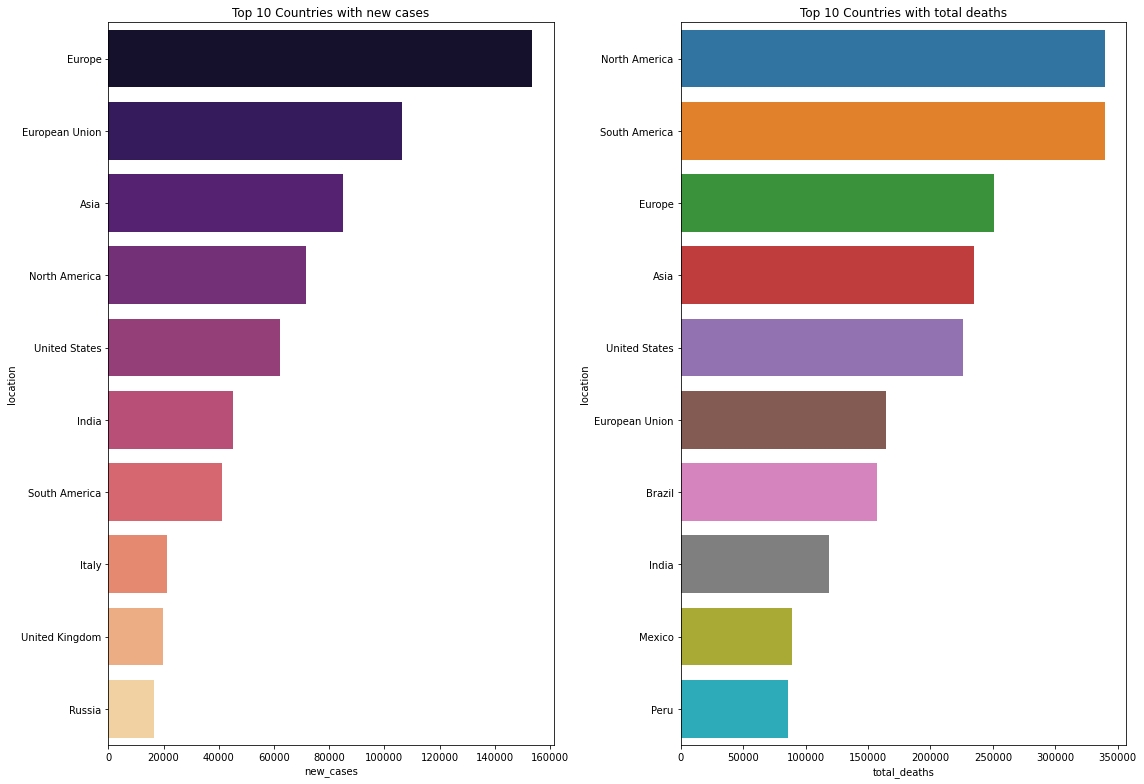

In [31]:
fig,axes = plt.subplots(figsize=(16,11),nrows =1, ncols = 2)
sns.barplot(x =top_10_countries_by_new_cases["new_cases"][:10], y =top_10_countries_by_new_cases["location"][:10],
           ax = axes[0],palette ="magma", orient = "h");
axes[0].set_title("Top 10 Countries with new cases")
sns.barplot(x = top_10_countries_by_most_deaths["total_deaths"][:10],y = top_10_countries_by_most_deaths["location"][:10],
           ax =axes[1], orient = "h")
axes[1].set_title("Top 10 Countries with total deaths")
fig.tight_layout()

From the above graph we can say that the Europe has the most number of new cases and after that Asia and US follows up.

From the second graph we can say that again in the North and South America most number of deaths occured due to COVID-19 and then Europe and Asia follows up.

Top 10 Countries with Least Deaths

In [32]:
top_10_countries_by_most_deaths ['location'].tail(10)
#top_10_countries_by_most_deaths["location"][-10:]

34750                             Grenada
47357                                Laos
57137                            Mongolia
71801               Saint Kitts and Nevis
72256                         Saint Lucia
72711    Saint Vincent and the Grenadines
75684                          Seychelles
77859                     Solomon Islands
85894                               Timor
91962                             Vatican
Name: location, dtype: object

In [33]:
top_10_countries_by_new_cases['location'].tail(10)

33545                               Ghana
75684                          Seychelles
16706            Central African Republic
15135                            Cameroon
77859                     Solomon Islands
34750                             Grenada
14672                            Cambodia
31661                               Gabon
35826                              Guinea
72711    Saint Vincent and the Grenadines
Name: location, dtype: object

In [34]:
india_data = data[data['location'] =='India']
india_data = india_data[~india_data['new_cases'].isin(['World','International'])]
india_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
39307,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jan,2020,2020-Jan
39308,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jan,2020,2020-Jan
39309,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Feb,2020,2020-Feb
39310,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Feb,2020,2020-Feb
39311,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Feb,2020,2020-Feb


In [35]:
india_data['date']=pd.to_datetime(india_data['date'],format="%Y-%m-%d")

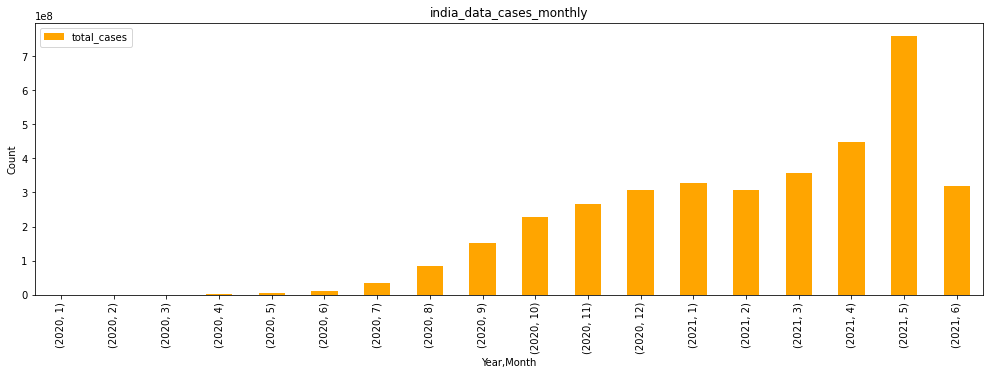

In [36]:
india_data_cases_monthly=india_data.groupby([india_data['date'].dt.year, india_data['date'].dt.month]).agg({'total_cases':sum})
india_data_cases_monthly.plot.bar(figsize=(17,5),color="orange")
plt.title("india_data_cases_monthly")
plt.xlabel("Year,Month")
plt.ylabel("Count")
plt.show()

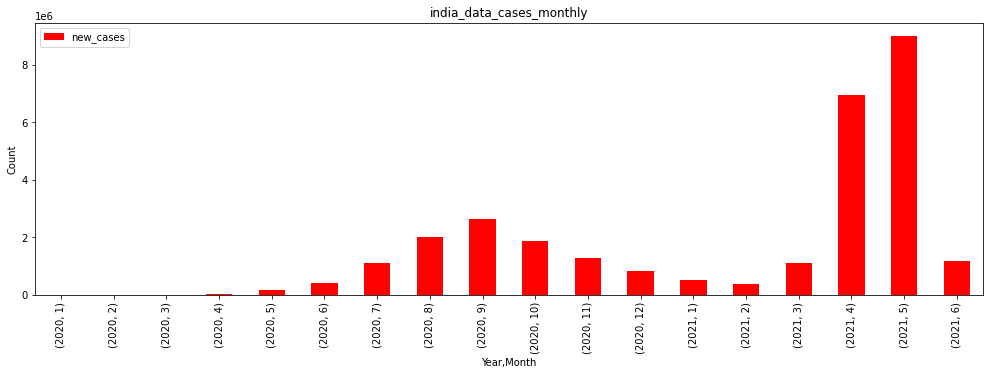

In [37]:
india_data_new_cases_monthly=india_data.groupby([india_data['date'].dt.year, india_data['date'].dt.month]).agg({'new_cases':sum})
india_data_new_cases_monthly.plot.bar(figsize=(17,5),color="red")
plt.title("india_data_cases_monthly")
plt.xlabel("Year,Month")
plt.ylabel("Count")
plt.show()
plt.show()

### New Deaths on Monthly Basis

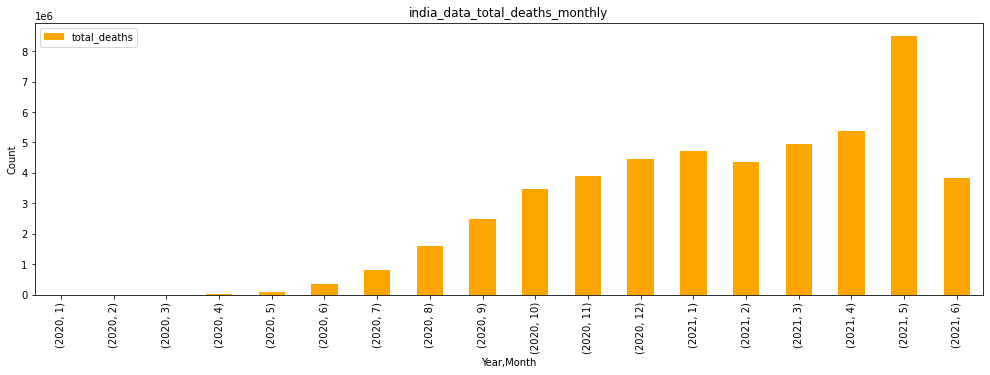

In [38]:
india_data_total_deaths_monthly=india_data.groupby([india_data['date'].dt.year, india_data['date'].dt.month]).agg({'total_deaths':sum})
india_data_total_deaths_monthly.plot.bar(figsize=(17,5),color="orange")
plt.title("india_data_total_deaths_monthly")
plt.xlabel("Year,Month")
plt.ylabel("Count")
plt.show()
plt.show()

### New Deaths occuring Monthly

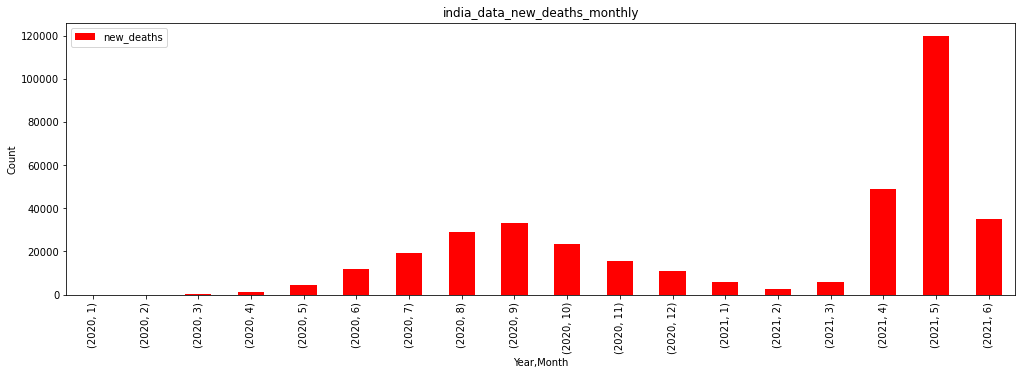

In [39]:
india_data_new_deaths_monthly=india_data.groupby([india_data['date'].dt.year, india_data['date'].dt.month]).agg({'new_deaths':sum})
india_data_new_deaths_monthly.plot.bar(figsize=(17,5),color="red")
plt.title("india_data_new_deaths_monthly")
plt.xlabel("Year,Month")
plt.ylabel("Count")
plt.show()

In [40]:
# india_data_deaths_monthly=india_data.groupby([india_data['date'].dt.year, india_data['date'].dt.month]).agg({'total_deaths':sum,'new_deaths':sum})
# # india_data_deaths_monthly=pd.DataFrame(india_data_deaths_monthly) 
# # india_data_deaths_monthly.index.rename(['Year','Month'], inplace=True)
# # india_data_deaths_monthly.reset_index(inplace=True)  
# india_data_deaths_monthly.plot.bar(figsize=(17,5))
# plt.title("india_data_new_deaths_monthly")
# plt.xlabel("Year,Month")
# plt.ylabel("Count")
# plt.show()

In [41]:
#india_data_deaths_monthly = india_data.groupby(pd.Grouper(key='date', axis=0, freq='M'))[["total_cases"]].sum()

In [42]:
#india_data_deaths_monthly.plot.bar(figsize=(15,5))

In [43]:
# india_data_deaths_monthly = india_data.groupby(pd.Grouper(key='Mon_Year', axis=0, freq='M'))[["total_cases","new_cases","total_deaths"]].sum()
# india_data_deaths_monthly.sort_values('total_deaths', ascending = True)[['total_deaths']].plot(kind = 'bar',figsize = (15, 5),
#                                                                              color = 'Cornflowerblue')

In [44]:
india_data_grouped=india_data.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()

In [45]:
india_data_grouped.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,2.0,1.0,0.000,0.0,0.0,0.000,0.002,0.001,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.38,2.760009e+09,900.838,56.4,11.978,6.828,12853.348,42.4,564.56,20.78,3.8,41.2,119.10,1.06,139.32,1.290,0.0
2020-02-29,84.0,2.0,1.859,0.0,0.0,0.000,0.056,0.002,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.51,4.002013e+10,13062.151,817.8,173.681,99.006,186373.546,614.8,8186.12,301.31,55.1,597.4,1726.95,15.37,2020.14,18.705,0.0
2020-03-31,10252.0,1394.0,987.002,226.0,35.0,24.289,7.430,1.010,0.717,0.161,0.026,0.017,34.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12019.0,174420.0,0.126,0.009,21655.0,0.016,0.462,327.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1690.27,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-04-30,447607.0,33466.0,28639.001,14417.0,1119.0,928.001,324.351,24.249,20.753,10.445,0.810,0.670,50.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683294.0,9153613.0,6.635,0.495,643830.0,0.466,1.428,651.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2959.30,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2020-05-31,3088494.0,155746.0,136819.855,94154.0,4254.0,3809.714,2238.033,112.860,99.145,68.227,3.085,2.762,41.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2906826.0,67994797.0,49.273,2.105,2695128.0,1.953,1.517,659.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2583.22,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0


In [46]:
top_10_india_total_deaths  = india_data_grouped.sort_values("total_deaths", ascending = False)
top_10_india_total_deaths.head(10)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-31,760936972.0,9010075.0,9673995.717,8510944.0,120042.0,120495.287,551401.852,6529.020,7010.120,6167.333,86.985,87.315,28.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55068332.0,9.467082e+09,6860.182,39.907,57799784.0,41.884,5.291,201.2,5.432545e+09,4.297974e+09,1.134571e+09,55496176.0,58936437.0,393.67,311.45,82.20,42710.0,2465.17,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2021-04-30,447598593.0,6943304.0,5996759.285,5389224.0,48926.0,39776.715,324345.775,5031.364,4345.464,3905.222,35.453,28.824,41.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42719146.0,7.913171e+09,5734.164,30.956,40424414.0,29.295,4.200,247.8,3.038130e+09,2.610993e+09,4.271372e+08,77932654.0,84035890.0,220.15,189.23,30.97,60895.0,2126.88,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2021-03-31,357487053.0,1109424.0,969674.145,4941266.0,5770.0,5055.286,259047.767,803.928,702.661,3580.616,4.181,3.664,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24141288.0,6.652487e+09,4820.627,17.493,26862855.0,19.468,1.067,1011.1,1.166007e+09,9.755784e+08,1.904285e+08,50816630.0,47519159.0,84.49,70.67,13.80,34432.0,1838.45,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2021-01-31,326908857.0,490936.0,493882.570,4714113.0,5654.0,5863.855,236889.724,355.750,357.887,3416.012,4.096,4.248,28.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24539098.0,5.746644e+09,4164.222,17.781,25385680.0,18.398,0.601,1602.5,2.832321e+07,2.832321e+07,0.000000e+00,3758843.0,3379485.0,2.05,2.05,0.00,2449.0,2099.48,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-12-31,307985456.0,803865.0,875729.428,4468495.0,11117.0,11948.716,223177.158,582.509,634.585,3238.030,8.052,8.656,26.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29731625.0,4.711351e+09,3414.012,21.546,31933829.0,23.141,0.847,1176.8,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2138.38,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2021-02-28,305984490.0,354631.0,345920.857,4362199.0,2765.0,2817.859,221727.187,256.976,250.666,3161.005,2.005,2.044,28.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19642734.0,5.781271e+09,4189.314,14.235,19445355.0,14.093,0.499,1584.5,2.377621e+08,2.211475e+08,1.661464e+07,10078106.0,10103631.0,17.24,16.02,1.20,7320.0,1733.26,3.864012e+10,12611.732,789.6,167.692,95.592,179946.872,593.6,7903.84,290.92,53.2,576.8,1667.40,14.84,1950.48,18.060,0.0
2020-11-30,265835139.0,1278727.0,1305752.999,3909675.0,15510.0,15628.287,192633.548,926.613,946.194,2833.087,11.238,11.324,28.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [47]:
top_10_india_total_cases  = india_data.sort_values("total_cases", ascending = False)
top_10_india_total_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
39805,IND,Asia,India,2021-06-11,29359155.0,84332.0,94896.571,367081.0,4002.0,3285.571,21274.682,61.110,68.765,266.000,2.900,2.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2044131.0,374242384.0,271.189,1.481,2401220.0,1.740,NaN,NaN,samples tested,243703242.0,197415653.0,46287589.0,3421339.0,2870782.0,17.66,14.31,3.35,2080.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39804,IND,Asia,India,2021-06-10,29274823.0,92291.0,100067.571,363079.0,7374.0,3196.714,21213.572,66.877,72.513,263.100,5.343,2.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004690.0,372198253.0,269.708,1.453,2630801.0,1.906,0.038,26.3,samples tested,240281903.0,194325996.0,45955907.0,3425398.0,3133931.0,17.41,14.08,3.33,2271.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39803,IND,Asia,India,2021-06-09,29182532.0,93463.0,105792.286,355705.0,2177.0,2530.857,21146.695,67.727,76.661,257.756,1.578,1.834,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985967.0,370193563.0,268.255,1.439,2876605.0,2.084,0.037,27.2,samples tested,236856505.0,191222380.0,45634125.0,3175576.0,3025477.0,17.16,13.86,3.31,2192.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39802,IND,Asia,India,2021-06-08,29089069.0,92596.0,111605.286,353528.0,2219.0,2632.286,21078.969,67.098,80.873,256.179,1.608,1.907,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873485.0,368207596.0,266.816,1.358,3059334.0,2.217,0.036,27.4,samples tested,233680929.0,188363894.0,45317035.0,3190277.0,2935027.0,16.93,13.65,3.28,2127.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39801,IND,Asia,India,2021-06-07,28996473.0,86498.0,117347.000,351309.0,2123.0,2773.429,21011.870,62.680,85.034,254.571,1.538,2.010,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587589.0,366334111.0,265.459,1.150,3066747.0,2.222,0.038,26.1,samples tested,230490652.0,185501579.0,44989073.0,2449607.0,2862965.0,16.70,13.44,3.26,2075.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39800,IND,Asia,India,2021-06-06,28909975.0,100636.0,123205.857,349186.0,2427.0,2869.429,20949.191,72.924,89.279,253.033,1.759,2.079,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3572380.0,364746522.0,264.308,2.589,3080396.0,2.232,0.040,25.0,samples tested,228041045.0,183275704.0,44765341.0,2469901.0,2767989.0,16.52,13.28,3.24,2006.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,Jun,2021,2021-Jun
39799,IND,Asia,India,2021-06-05,28809339.0,114460.0,130648.429,346759.0,2677.0,2969.571,20876.266,82.942,94.672,251.27

In [48]:
top_10_india_new_cases  = india_data_grouped.sort_values("new_cases", ascending = False)
top_10_india_new_cases.head(10)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-31,760936972.0,9010075.0,9673995.717,8510944.0,120042.0,120495.287,551401.852,6529.020,7010.120,6167.333,86.985,87.315,28.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55068332.0,9.467082e+09,6860.182,39.907,57799784.0,41.884,5.291,201.2,5.432545e+09,4.297974e+09,1.134571e+09,55496176.0,58936437.0,393.67,311.45,82.20,42710.0,2465.17,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2021-04-30,447598593.0,6943304.0,5996759.285,5389224.0,48926.0,39776.715,324345.775,5031.364,4345.464,3905.222,35.453,28.824,41.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42719146.0,7.913171e+09,5734.164,30.956,40424414.0,29.295,4.200,247.8,3.038130e+09,2.610993e+09,4.271372e+08,77932654.0,84035890.0,220.15,189.23,30.97,60895.0,2126.88,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2020-09-30,151735176.0,2621418.0,2604568.141,2476764.0,33390.0,33006.284,109952.676,1899.571,1887.363,1794.750,24.194,23.916,30.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31888815.0,1.763307e+09,1277.755,23.107,31493820.0,22.820,2.483,363.3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2551.00,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2020-08-31,82734792.0,1995178.0,1927958.144,1582152.0,28777.0,28221.001,59952.554,1445.776,1397.066,1146.483,20.855,20.450,34.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23474944.0,9.237065e+08,669.350,17.012,22237196.0,16.113,2.744,354.5,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2655.15,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-10-31,228641810.0,1871498.0,1974798.715,3481048.0,23433.0,25098.287,165681.945,1356.153,1431.010,2522.489,16.984,18.189,27.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34599335.0,2.858699e+09,2071.512,25.071,34545162.0,25.032,1.771,561.2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2110.59,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-11-30,265835139.0,1278727.0,1305752.999,3909675.0,15510.0,15628.287,192633.548,926.613,946.194,2833.087,11.238,11.324,28.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31583912.0,3.754642e+09,2720.746,22.889,31519944.0,22.840,1.243,725.2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,1921.20,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2021-06-30,317640413.0,1184111.0,1384628.001,3844522.0,35186.0,33092.857,230173.481,858.050,1003.350,2785.878,25.497,23.979,6.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29375501.0,3.985163e+09,2887.789

In [49]:
top_10_india_new_deaths  = india_data_grouped.sort_values("new_deaths", ascending = False)
top_10_india_new_deaths.head(10)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-31,760936972.0,9010075.0,9673995.717,8510944.0,120042.0,120495.287,551401.852,6529.020,7010.120,6167.333,86.985,87.315,28.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55068332.0,9.467082e+09,6860.182,39.907,57799784.0,41.884,5.291,201.2,5.432545e+09,4.297974e+09,1.134571e+09,55496176.0,58936437.0,393.67,311.45,82.20,42710.0,2465.17,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2021-04-30,447598593.0,6943304.0,5996759.285,5389224.0,48926.0,39776.715,324345.775,5031.364,4345.464,3905.222,35.453,28.824,41.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42719146.0,7.913171e+09,5734.164,30.956,40424414.0,29.295,4.200,247.8,3.038130e+09,2.610993e+09,4.271372e+08,77932654.0,84035890.0,220.15,189.23,30.97,60895.0,2126.88,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2021-06-30,317640413.0,1184111.0,1384628.001,3844522.0,35186.0,33092.857,230173.481,858.050,1003.350,2785.878,25.497,23.979,6.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29375501.0,3.985163e+09,2887.789,21.286,29215877.0,21.170,0.499,215.9,2.509391e+09,2.015999e+09,4.933923e+08,33253347.0,30588440.0,181.82,146.08,35.74,22165.0,0.00,1.518005e+10,4954.609,310.2,65.879,37.554,70693.414,233.2,3105.08,114.29,20.9,226.6,655.05,5.83,766.26,7.095,0.0
2020-09-30,151735176.0,2621418.0,2604568.141,2476764.0,33390.0,33006.284,109952.676,1899.571,1887.363,1794.750,24.194,23.916,30.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31888815.0,1.763307e+09,1277.755,23.107,31493820.0,22.820,2.483,363.3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2551.00,4.140013e+10,13512.570,846.0,179.670,102.420,192800.220,636.0,8468.40,311.70,57.0,618.0,1786.50,15.90,2089.80,19.350,0.0
2020-08-31,82734792.0,1995178.0,1927958.144,1582152.0,28777.0,28221.001,59952.554,1445.776,1397.066,1146.483,20.855,20.450,34.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23474944.0,9.237065e+08,669.350,17.012,22237196.0,16.113,2.744,354.5,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2655.15,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-10-31,228641810.0,1871498.0,1974798.715,3481048.0,23433.0,25098.287,165681.945,1356.153,1431.010,2522.489,16.984,18.189,27.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34599335.0,2.858699e+09,2071.512,25.071,34545162.0,25.032,1.771,561.2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.0,2110.59,4.278014e+10,13962.989,874.2,185.659,105.834,199226.894,657.2,8750.68,322.09,58.9,638.6,1846.05,16.43,2159.46,19.995,0.0
2020-07-31,32829678.0,1110507.0,1006247.572,812555.0,19111.0,18124.715,23789.548,804.711,729.163,588.806,13.849,13.131,38.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10224316.0,4.058794e+08,

In [50]:
india_data=india_data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
india_data.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
39307,2020-01-30,1.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
39308,2020-01-31,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
39309,2020-02-01,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
39310,2020-02-02,2.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
39311,2020-02-03,3.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN


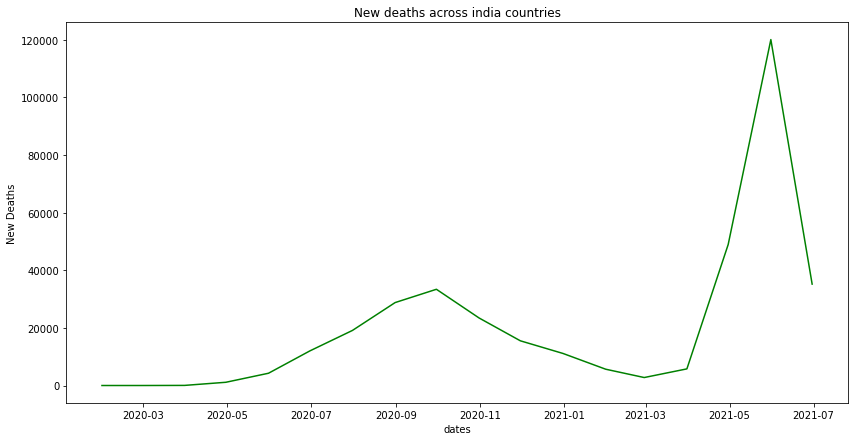

In [51]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'date',y = 'new_deaths',data = top_10_india_new_deaths, color='green')
plt.title("New deaths across india countries")
plt.xlabel("dates")
plt.ylabel("New Deaths")
plt.show()

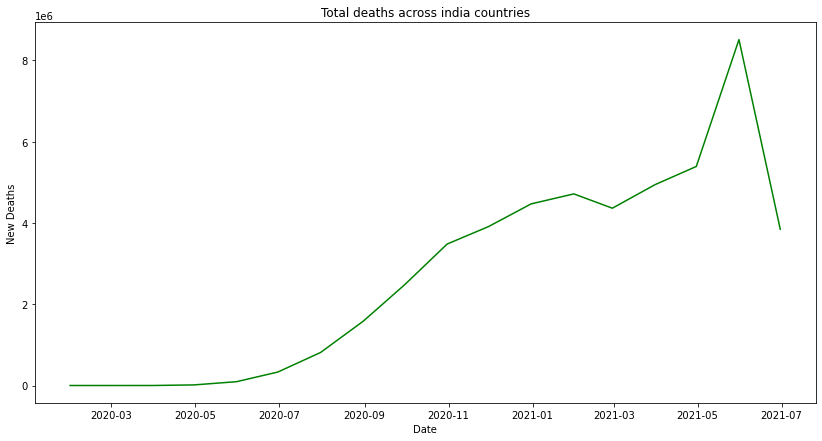

In [52]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'date',y = 'total_deaths',data = top_10_india_total_deaths, color='green')
plt.title("Total deaths across india countries")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.show()

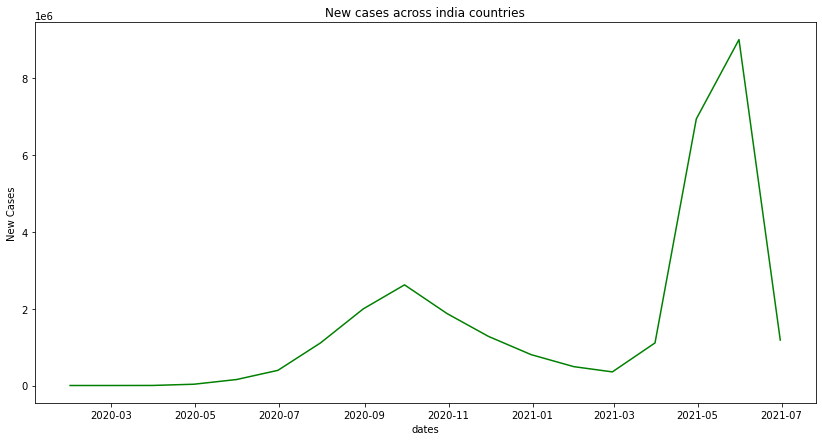

In [53]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'date',y = 'new_cases',data = top_10_india_new_cases, color='green')
plt.title("New cases across india countries")
plt.xlabel("dates")
plt.ylabel("New Cases")
plt.show()

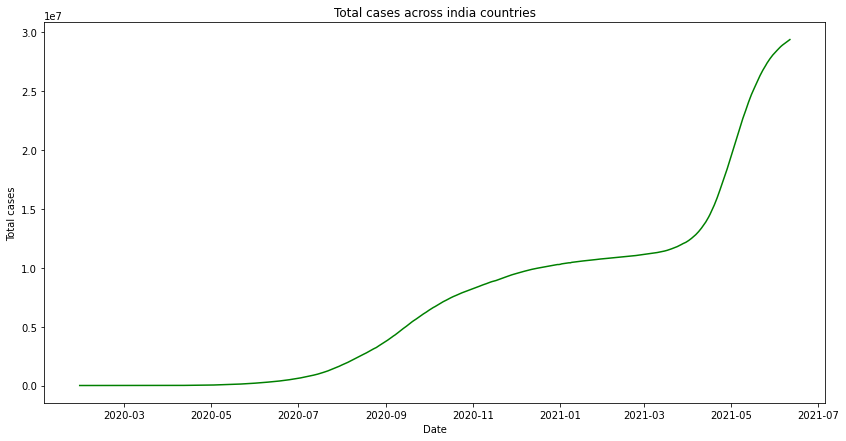

In [54]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'date',y = 'total_cases',data = top_10_india_total_cases, color='green')
plt.title("Total cases across india countries")
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.show()

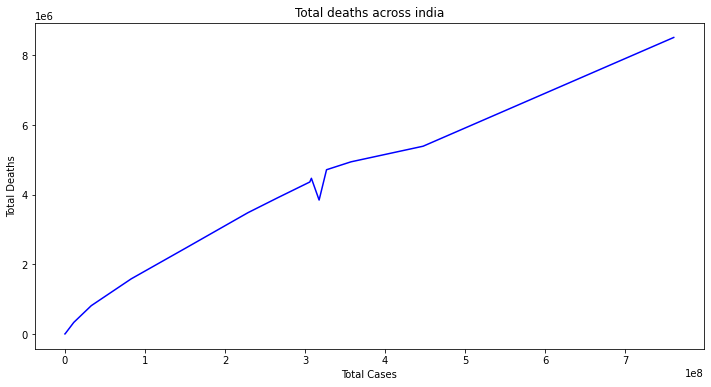

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'total_cases',y = 'total_deaths',data = india_data_grouped, color='blue')
plt.title("Total deaths across india")
plt.xlabel('Total Cases')
plt.ylabel("Total Deaths")
plt.show()

In [56]:
last_day_cases = data[data['date']=='2021-06-11']

In [57]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Mon,Year,Year_Mon
93737,OWID_WRL,NaN,World,2021-06-11,175286322.0,421046.0,385239.429,3785342.0,11991.0,10455.571,22487.601,54.016,49.423,485.624,1.538,1.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.328012e+09,966133383.0,492974551.0,29862655.0,33270703.0,29.87,12.39,6.32,4268.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,Jun,2021,2021-Jun
4975,OWID_ASI,NaN,Asia,2021-06-11,53233373.0,158126.0,163175.143,734452.0,5254.0,4492.857,11473.087,34.080,35.168,158.292,1.132,0.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337865e+09,335739706.0,117169487.0,24234341.0,23877805.0,28.83,7.24,2.53,5146.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2021,2021-Jun
29099,OWID_EUR,NaN,Europe,2021-06-11,47388866.0,43049.0,42161.571,1087407.0,1126.0,1108.571,63296.551,57.500,56.315,1452.432,1.504,1.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.142009e+08,265162392.0,154352249.0,2182830.0,4535973.0,55.32,35.42,20.62,6059.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2021,2021-Jun
63273,OWID_NAM,NaN,North America,2021-06-11,39222127.0,38471.0,26831.857,890856.0,1102.0,732.714,66245.513,64.977,45.319,1504.641,1.861,1.238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.883568e+08,233816333.0,165686867.0,1342880.0,2151933.0,65.59,39.49,27.98,3635.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2021,2021-Jun
90604,USA,North America,United States,2021-06-11,33449200.0,24904.0,15129.000,599472.0,716.0,412.429,101054.177,75.238,45.707,1811.079,2.163,1.246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.065098e+08,172758350.0,142095530.0,822177.0,1055610.0,91.65,51.66,42.49,3156.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN,Jun,2021,2021-Jun


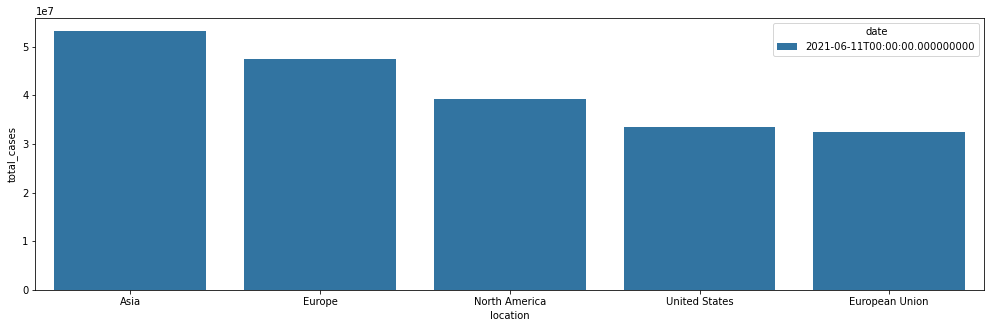

In [58]:
# plot on bar plot
plt.figure(figsize=(17,5))
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

Data Visualization of India's last five days covid cases

In [66]:
india_last_5_days=india_data.tail()

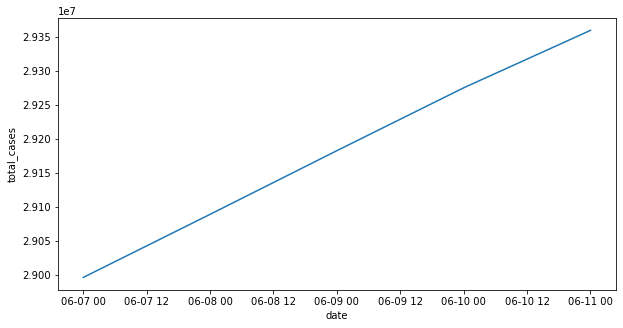

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

Total test per day

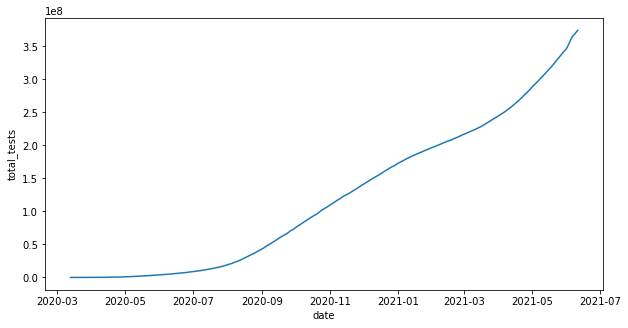

In [69]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date",y="total_tests",data=india_data)
plt.show()

Total test last 5 days

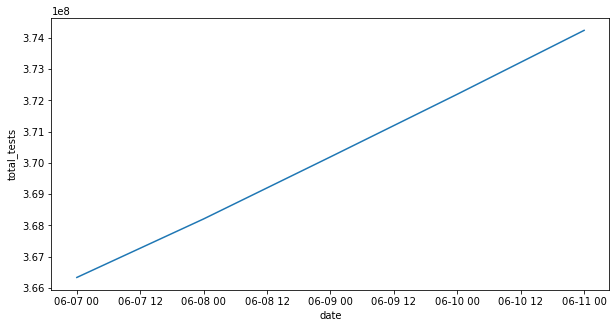

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()